## The following notebook can be used to replicate results found in Figure 4 

### 1) identifying the best augemented model strategy (Fig. 4a)

In [2]:
import sys
import matplotlib.pyplot as plt
import src.AugmentedMLDE_Class as mlde

###### Note: Training and hyperparameter tuning for moclobemide and metoclopramide may take several minutes
compare_and_predict() calculates NDCG and spearman correlation coefficient for every combination of zero-shot predictor and encoding

    ._all_predictions - returns predictions for entire combinatorial space
    ._test_predictions - model predictions for the test data set
    ._model_metrics - spearman_r and ndcg for predictions made on the withheld test data set
    
train_and_predict() takes specified zero-shot predictors and encodings to make focused predictions

    ._predictions_df - model predictions for the entire combinatorial space

In [3]:
#Moclobemide training and predictions
moc_training_data = 'data\ML_validation\moclobemide_train.xlsx'
moc_test_data = r'data\ML_validation\moclobemide_test.xlsx'
moc_ec = r'data\zero-shot_predictions\moclobemide_zeroshot_EC.csv'
moc_maestro = r'data\zero-shot_predictions\moclobemide_zeroshot_Maestro.csv'
moc_esm1b = r'data\zero-shot_predictions\moclobemide_zeroshot_ESM1b_nc.csv'

moc = mlde.AugmentedMLDEmodel(moc_training_data, moc_test_data, 4, moc_ec, moc_maestro, moc_esm1b)
moc.compare_and_predict()


#Metoclopramide training and predictions
meto_training_data = r'data\ML_validation\metoclopramide_train.xlsx'
meto_test_data = r'data\ML_validation\metoclopramide_test.xlsx'
meto_ec = r'data\zero-shot_predictions\metoclopramide_zeroshot_EC.csv'
meto_maestro = r'data\zero-shot_predictions\metoclopramide_zeroshot_Maestro.csv'
meto_esm1b = r'data\zero-shot_predictions\metoclopramide_zeroshot_ESM1b_nc.csv'

meto = mlde.AugmentedMLDEmodel(meto_training_data, meto_test_data, 4, meto_ec, meto_maestro, meto_esm1b)
meto.compare_and_predict()

In [4]:
moc._model_metrics.sort_values("NDCG", ascending=False)[0:4]

,architecture,spearman_r,NDCG,Tuned Alpha
0,Simple: One Hot,0.549406,0.694714,Ridge(alpha=2.03)
1,AugmentedESM: One Hot,0.572475,0.705587,Ridge(alpha=1.02)
2,AugmentedEC: One Hot,0.598470,0.719806,Ridge(alpha=0.01)
3,AugmentedEnergy: One Hot,0.543583,0.708460,Ridge(alpha=2.03)
4,AugmentedEC_Energy: One Hot,0.598598,0.719900,Ridge(alpha=0.01)
5,AugmentedESM_Energy: One Hot,0.561464,0.692689,Ridge(alpha=2.03)
6,AugmentedEC_ESM: One Hot,0.599266,0.720844,Ridge(alpha=0.01)
7,AugmentedEC_Energy_ESM: One Hot,0.599449,0.720936,Ridge(alpha=0.01)
8,Simple: Georgiev,0.551688,0.699999,Ridge(alpha=39.4)
9,AugmentedESM: Georgiev,0.573618,0.690254,Ridge(alpha=25.26)


In [5]:
meto._model_metrics.sort_values("NDCG", ascending=False)[0:4]

,architecture,spearman_r,NDCG,Tuned Alpha
0,Simple: One Hot,0.552956,0.454944,Ridge(alpha=9.1)
1,AugmentedESM: One Hot,0.532716,0.403321,Ridge(alpha=5.06)
2,AugmentedEC: One Hot,0.549505,0.311927,Ridge(alpha=4.05)
3,AugmentedEnergy: One Hot,0.543565,0.452557,Ridge(alpha=11.12)
4,AugmentedEC_Energy: One Hot,0.535194,0.244400,Ridge(alpha=5.06)
5,AugmentedESM_Energy: One Hot,0.545710,0.397511,Ridge(alpha=5.06)
6,AugmentedEC_ESM: One Hot,0.555621,0.427972,Ridge(alpha=3.04)
7,AugmentedEC_Energy_ESM: One Hot,0.550079,0.305398,Ridge(alpha=4.05)
8,Simple: Georgiev,0.574215,0.590690,Ridge(alpha=100.0)
9,AugmentedESM: Georgiev,0.499453,0.791286,Ridge(alpha=0.01)


### 2) The top 25 predictions for moclobemide and metoclopramide (Fig. 4b,c)

In [6]:
moc.train_and_predict('AugmentedEC', 'Georgiev')
moc._predictions_df.sort_values("Prediction", ascending=False)[0:25]

Fitting 100 folds for each of 100 candidates, totalling 10000 fits


,Mutation,Prediction
126097,SSFV,7.420405
126197,SSLV,6.955472
126357,SSVV,6.839585
122897,SIFV,6.573433
126093,SSFQ,6.482120
126081,SSFC,6.328485
126096,SSFT,6.246194
126094,SSFR,6.152964
126091,SSFN,6.144362
122997,SILV,6.134386


In [7]:
meto.train_and_predict('AugmentedEC', 'Georgiev')
meto._predictions_df.sort_values("Prediction", ascending=False)[0:25]

Fitting 100 folds for each of 100 candidates, totalling 10000 fits


,Mutation,Prediction
152496,YCFT,8.438701
120496,SCFT,8.415469
152096,YAFT,8.131182
120096,SAFT,8.100879
136496,VCFT,7.848556
136096,VAFT,7.537846
158496,YTFT,7.474981
126496,STFT,7.462684
152495,YCFS,7.410519
120495,SCFS,7.391076


### 3) Model fidelity with reduced training sets (Fig. 4d,e)

(0.0, 0.8)

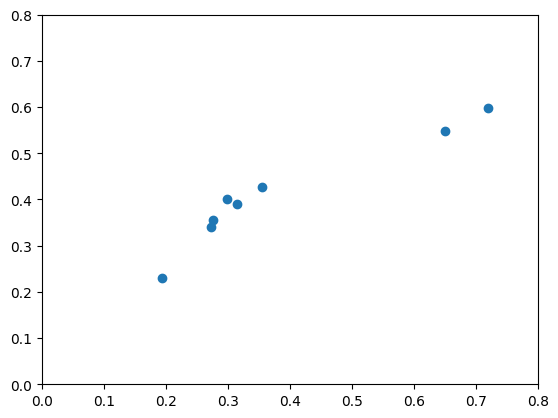

In [8]:
td_full = r'data\ML_validation\moclobemide_train.xlsx'
td_B1 = r'data\curated_reduced_AAs\moclobemide_train_BLOSUM1.xlsx'
td_B2 = r'data\curated_reduced_AAs\moclobemide_train_BLOSUM2.xlsx'
td_B3 = r'data\curated_reduced_AAs\moclobemide_train_BLOSUM3.xlsx'
td_B4 = r'data\curated_reduced_AAs\moclobemide_train_BLOSUM4.xlsx'
td_NDT = r'data\curated_reduced_AAs\moclobemide_train_NDT.xlsx'
td_NRT = r'data\curated_reduced_AAs\moclobemide_train_NRT.xlsx'
td_scan = r'data\curated_reduced_AAs\moclobemide_train_AGCP.xlsx'

train_list = [td_full, td_B1, td_B2, td_B3, td_B4, td_NDT, td_NRT, td_scan]

test_data = r'data\ML_validation\moclobemide_test.xlsx'
ec_file = r'data\zero-shot_predictions\moclobemide_zeroshot_EC.csv'
maestro_file = r'data\zero-shot_predictions\moclobemide_zeroshot_Maestro.csv'
esm1b_file = r'data\zero-shot_predictions\moclobemide_zeroshot_ESM1b_nc.csv'

ndcg_moc = {}
spearman_moc = {}

for i, training_set in enumerate(train_list):
    moc = mlde.AugmentedMLDEmodel(training_set, test_data, 4, ec_file, maestro_file, esm1b_file)
    moc.compare_and_predict()
    ndcg = moc._model_metrics['NDCG'][10]
    ndcg_moc[i] = ndcg
    spearman = moc._model_metrics['spearman_r'][10]
    spearman_moc[i] = spearman
    
plt.scatter(ndcg_moc.values(), spearman_moc.values())
plt.xlim(0, 0.8)
plt.ylim(0, 0.8)

(0.0, 1.0)

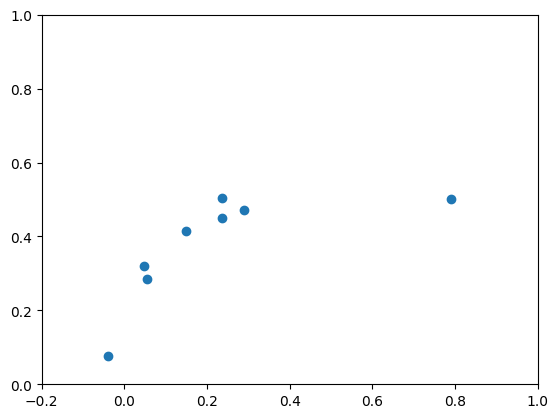

In [9]:
td_full = r'data\ML_validation\metoclopramide_train.xlsx'
td_B1 = r'data\curated_reduced_AAs\metoclopramide_train_BLOSUM1.xlsx'
td_B2 = r'data\curated_reduced_AAs\metoclopramide_train_BLOSUM2.xlsx'
td_B3 = r'data\curated_reduced_AAs\metoclopramide_train_BLOSUM3.xlsx'
td_B4 = r'data\curated_reduced_AAs\metoclopramide_train_BLOSUM4.xlsx'
td_NDT = r'data\curated_reduced_AAs\metoclopramide_train_NDT.xlsx'
td_NRT = r'data\curated_reduced_AAs\metoclopramide_train_NRT.xlsx'
td_scan = r'data\curated_reduced_AAs\metoclopramide_train_AGCP.xlsx'

train_list = [td_full, td_B1, td_B2, td_B3, td_B4, td_NDT, td_NRT, td_scan]

test_data = r'data\ML_validation\metoclopramide_test.xlsx'
ec_file = r'data\zero-shot_predictions\metoclopramide_zeroshot_EC.csv'
maestro_file = r'data\zero-shot_predictions\metoclopramide_zeroshot_Maestro.csv'
esm1b_file = r'data\zero-shot_predictions\metoclopramide_zeroshot_ESM1b_nc.csv'

ndcg_meto = {}
spearman_meto = {}

for i, training_set in enumerate(train_list):
    meto = mlde.AugmentedMLDEmodel(training_set, test_data, 4, ec_file, maestro_file, esm1b_file)
    meto.compare_and_predict()
    ndcg = meto._model_metrics['NDCG'][10]
    ndcg_meto[i] = ndcg
    spearman = meto._model_metrics['spearman_r'][10]
    spearman_meto[i] = spearman
    
plt.scatter(ndcg_meto.values(), spearman_meto.values())
plt.xlim(-0.2, 1)
plt.ylim(0, 1)